# Oil Spills detection via Sentinel 2

The oil spill from the tanker MV Wakashio stranded along the south-east coast of Mauritius appears like a tight snare around the island. We have taken a snip of the area using Sentinel-2 data to detect where spills appear more severe. 

In [1]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser("~"),"CLEOPE/Trials/modules"))
import data_processing_S2_affine as dp

You can choose to work with local files or using the Advanced API. Functions in this tutorial can manage both choices independently and automatically, but only if product of interest are provided (as a list or a file). <br> 
Please note that products used in this example notebook could be *offline*: use the `order` function in the `qm` module to retrieve them first.
### Using the Advanced API (ENS)
The input list must contain the position of products in the remote file system. Note that this list is automatically provided using the `SEARCH.ipynb` trial notebook, aimed at facilitating the data access via ENS. Products are found via ENS at their pseudopath, accessed and processed in situ, without any local download. <br>
### Using OData API
Load a custom list containing the products downloaded in the `local_files` folder. To do that, use the `download` function in the `qm` module, which will download and save items via your own Jupyter Notebook using OData protocol. Check out `DISCOVER_ONDA.ipynb` for more details. <br>
Downloads are stored in the 📁`local_files` folder. The 📄`list_local.txt` file will be created and updated in this working directory with the new downloaded item, authomatically.

In [2]:
file = dp.product("tiles_T40KEC.txt") # load your custom product list

## Sentinel-2 bands at your disposal

|MSI band|Descriptor|Central wavelength|Resolution|
|--------|----------|------------------|----------|
|Band 2|B|490 nm|10m|
|Band 3|G|560 nm|10m|
|Band 4|R|665 nm|10m|
|Band 8|NIR|833 nm|10m|
|Band 5|RedEdge 1|705|20m|
|Band 6|RedEdge 2|740|20m|
|Band 7|RedEdge 3|783|20m|
|Band 8A|Narrow NIR|865|20m|
|Band 9| Water Vapor|945|60m|
|Band 10|SWIR Cirrus|1373|60m|
|Band 11|SWIR 1|1610|20m|
|Band 12|SWIR 2|2190|20m|

⚠️ Be careful that color composition and visualisation are a memory consuming processing tasks. Check out RAM information displayed in your IDLE.

### The true color RGB stack

In this trial notebooks the true color RGB stack is computed over the area of interest.<br>
The combination (R,G,B) = (B04,B03,B02) is the popular true color RGB stack. You can apply this composition to your own dataset using the `rgb_bands` function provided in the `data_processing_S2_affine` module.

### Affine reprojection of geo-coordinates

Sentinel-2 `.jp2` data are already geo-referenced but projection is not suitable for a (_lat_,_lon_) clip as it is. The `reproject` function provides the reprojection over bands specified as input argument. You can also call the `clip` function providing the input reprojected dataset and (_xmin_,_xmax_,_ymin_,_ymax_) boundaries to obtain a subset of the image (this will speed-up computations).

In [3]:
rgb = []
for f in file:
    rgb.append(dp.reproject(bands=dp.rgb_bands(f))) # true color RGB

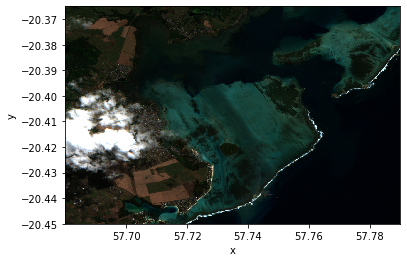

In [4]:
# take a clip of the tile over coordinates xmin,xmax,ymin,ymax
bounds = (57.68,57.79,-20.45,-20.365) 
cli_rgb = dp.clip(rgb[0],bounds,plot=True) # only one image in this example

### Color enhanced RGB plot

To enhance image colors and thus detect oil spills, we can easily play with the `vmin` and `vmax` arguments of `imshow` function of `matplotlib` module. In the image below, thresholds are set to the 2nd and 78th percentile of the color distribution.<br>
Oil traces are signed by the red arrows, while the tanker MV Wakashio lies stranded along the south-east coast.

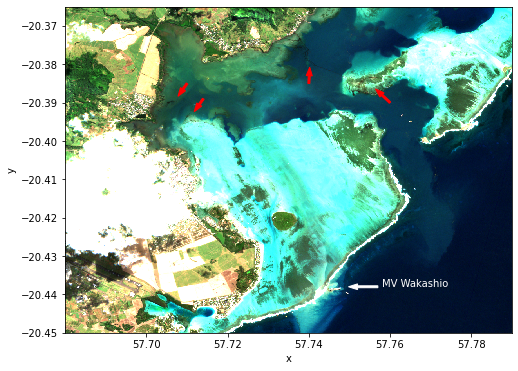

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(8,6))
cli_rgb.plot.imshow(vmin=np.quantile(cli_rgb,0.02),vmax=np.quantile(cli_rgb,0.78),ax=ax)
ax.arrow(57.76,-20.39,-0.002,0.002,color='r',width=5E-4)
ax.arrow(57.74,-20.385,0.0001,0.002,color='r',width=5E-4)
ax.arrow(57.71,-20.385,-0.001,-0.0015,color='r',width=5E-4)
ax.arrow(57.714,-20.389,-0.001,-0.0015,color='r',width=5E-4)
ax.arrow(57.757,-20.438,-0.005,0,color='w',width=5E-4)
ax.text(57.758,-20.438,"MV Wakashio",horizontalalignment='left',color="w")
plt.show()

### 📑 References
- [esa.int](https://www.esa.int/ESA_Multimedia/Images) 